# Problem 1

In [47]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
df = pd.read_csv("Data_PG_UN.csv")
df.describe()

,PG,UN,HH,MKT,RF
count,264.000000,264.000000,264.000000,264.000000,264.000000
mean,0.009986,0.010493,0.008408,0.008219,0.002131
std,0.056973,0.067521,0.042101,0.044154,0.001846
min,-0.325779,-0.167535,-0.142600,-0.171500,0.000000
25%,-0.020998,-0.024973,-0.013200,-0.018000,0.000100
50%,0.012294,0.014835,0.011450,0.014400,0.001700
75%,0.043510,0.047397,0.033825,0.037725,0.004000
max,0.267136,0.296875,0.185400,0.113500,0.005600


In [30]:
# I don't know which one is the R_UL, I use UN to stand for it.
# Right Answer
import statsmodels.api as sm
y = df.UN - df.RF
X = df.MKT - df.RF
X = sm.add_constant(X)
model = sm.OLS(y, X)
fit = model.fit()
print (fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.3089
Date:                Wed, 17 Feb 2021   Prob (F-statistic):              0.579
Time:                        23:31:19   Log-Likelihood:                 337.83
No. Observations:                 264   AIC:                            -671.7
Df Residuals:                     262   BIC:                            -664.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0080      0.004      1.916      0.0

In [31]:
# My Answer
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
df = pd.read_csv("Data_PG_UN.csv")
y = df.UN - df.RF
X = df.MKT - df.RF
def LinearRegression(x,y):
    length = len(x)
    x_mean = x.mean()
    a = (y * (x - x_mean)).sum() / ((x ** 2).sum() - x.sum() ** 2 / length)
    b = (y - a * x).sum() / length
    return [a, b]
beta, alpha = LinearRegression(X,y)
yhat = alpha + beta * X

In [40]:
SS_res = sum((yhat -y)**2)
SS_tot = sum((y-y.mean())**2)
RSquared = 1-SS_res/SS_tot
n = len(X)
AdRSquared = 1-(SS_res/(n-2-1))/(SS_tot/(n-1))

In [41]:
alpha, beta, RSquared, AdRSquared

(0.008043473175918806,
 0.05242950285674815,
 0.0011775864903335043,
 -0.006476225107441724)

(a) report the coefficient estimates, the $R^2$ and the $Adjusted-R^2$

$\alpha = 0.0080$ and $\beta = 0.0524$

 $R^2 = 0.001$ 
 
 ${Adjusted-R}^2 = -0.003$

(b) Construct a scatterplot of UL returns on the y-axis and GRSP-VW returns on the x-axis as well as the regression line.

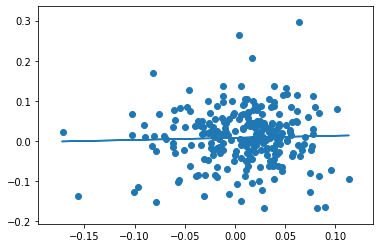

In [44]:
plt.scatter(x= df.MKT, y = df.UN)
plt.plot(X, yhat)
plt.show()

(c) Compute the variance-covariance matrix of the OLS coefficients under the assumption of homoskedasticity.

In [46]:
n = len(y) 
k = 2 # the size of the matrix is k * k
sigmaHat_Squated = sum((yhat - y)**2)/(n-k)

In [66]:
x = np.matrix([X,np.ones(X.shape[0])])
V = np.linalg.inv((x * x.T)) * sum((yhat - y)**2)
V

matrix([[ 2.33156187, -0.01419603],
        [-0.01419603,  0.00461568]])

(d) Use t-test to test the null hypothesis that each regression coefficient is individually equal to 0.

In [73]:
# testing beta
S_xx = sum((X-X.mean())**2)
S_yy = sum((y-y.mean())**2)
S_xy = sum((X-X.mean())*(y-y.mean()))
Q_e  = sum((y-yhat)**2)
n    = len(y)
sgimaHat_Squated = Q_e / (n-2)
sigmaHat = sgimaHat_Squated**0.5
tvalue_beta = np.abs(beta)/sigmaHat * np.sqrt(S_xx)

In this question, we set confidencial level to 95%.

In [74]:
from scipy.stats import t
t_alpha = 0.95
n = len(y)
k = 2
reject_t_beta = t.pdf((1-t_alpha)/2, n-k)

In [75]:
tvalue_beta > reject_t_beta

True

As we can see, beta isn't euqal to 0 under confidencial level 95%.

In [77]:
# testing alpha
n = len(y)
t_value_alpha = np.abs(alpha) / sigmaHat / (1/n + x.mean()**2/S_xx)**0.5
t_value_alpha

0.16885112792598125

In [79]:
reject_t_alpha = t.pdf((1-t_alpha)/2, n-k)
reject_t_alpha

0.3984367865824333

As we can see, alpha is euqal to 0 under confidencial level 95%.

(e) Assess whether there is significant evidence for heteroskedasticity.

In [83]:
x = np.matrix([X,np.ones(X.shape[0])])
xx_inv = np.linalg.inv((x * x.T))
e_Squared = (y-yhat)**2
middle = 0
for i in range(n):
    middle +=  x[:,i] * x[:,i].T * e_Squared[i]
V_W = xx_inv * middle * xx_inv
V_W

matrix([[ 1.25353337e-02, -5.30367346e-05],
        [-5.30367346e-05,  1.73373722e-05]])

In [84]:
V

matrix([[ 2.33156187, -0.01419603],
        [-0.01419603,  0.00461568]])

As we can see from above, the V and V_W is different, whicn means they have different standard errors, and the heteroskedasticity holds.

(f) Compute standard errors and the 90%, 95% and 99% confidence intervals under the assumption of homoskedasticity. 

In [85]:
np.sqrt(V)

matrix([[1.52694527,        nan],
        [       nan, 0.0679388 ]])

the standard error of alpha is 0.004

the standard error of beta  is 0.094

(g) Compute he vc-matrix of OLS under heteroskedasticity

In [86]:
x = np.matrix([X,np.ones(X.shape[0])])
xx_inv = np.linalg.inv((x * x.T))
e_Squared = (y-yhat)**2
middle = 0
for i in range(n):
    middle +=  x[:,i] * x[:,i].T * e_Squared[i]
V_W = xx_inv * middle * xx_inv
V_W

matrix([[ 1.25353337e-02, -5.30367346e-05],
        [-5.30367346e-05,  1.73373722e-05]])

(h) Compute standard errors and the 90%, 95% and 99% confidence intervals under the assumption of heteroskedasticity.

In [88]:
np.sqrt(V_W)

matrix([[0.1119613 ,        nan],
        [       nan, 0.00416382]])

the standard error of alpha is 0.1119613 

the standard error of beta  is 0.00416382

(i) Use t-test to test the null hypothesis that each regression coefficient is individually equal to 0 under heteroskedasticity

(j) Compute the AIC, BIC and Hannah-Quinn ICs

# Problem 2

In [92]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
df = pd.read_csv("Data_PG_UN.csv")
df.describe()

,PG,UN,HH,MKT,RF
count,264.000000,264.000000,264.000000,264.000000,264.000000
mean,0.009986,0.010493,0.008408,0.008219,0.002131
std,0.056973,0.067521,0.042101,0.044154,0.001846
min,-0.325779,-0.167535,-0.142600,-0.171500,0.000000
25%,-0.020998,-0.024973,-0.013200,-0.018000,0.000100
50%,0.012294,0.014835,0.011450,0.014400,0.001700
75%,0.043510,0.047397,0.033825,0.037725,0.004000
max,0.267136,0.296875,0.185400,0.113500,0.005600


In [104]:
# Right Answer For References
import statsmodels.api as sm
y = df.UN - df.RF
X = pd.DataFrame()
X["Market_Rf"] = df.MKT - df.RF
X["HH_Rf"] = df.HH - df.RF
X = sm.add_constant(X)
model = sm.OLS(y, X)
fit = model.fit()
print (fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.3293
Date:                Thu, 18 Feb 2021   Prob (F-statistic):              0.720
Time:                        05:53:19   Log-Likelihood:                 338.01
No. Observations:                 264   AIC:                            -670.0
Df Residuals:                     261   BIC:                            -659.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0082      0.004      1.955      0.0

#### MY ANSWER STARTS HERE

(a) report the coefficient estimates, the $R^2$ and the $Adjusted-R^2$

In [103]:
y = df.UN - df.RF
X = pd.DataFrame()
X["Market_Rf"] = df.MKT - df.RF
X["HH_Rf"] = df.HH - df.RF
X

,Market_Rf,HH_Rf
0,0.0287,0.0222
1,-0.0256,-0.0142
2,-0.0478,-0.0531
3,0.0068,0.0137
4,0.0058,0.0061
...,...,...
259,-0.0604,-0.0694
260,-0.0308,-0.0055
261,0.0775,0.0586
262,0.0056,-0.0109


# Problem 4

In [89]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
df = pd.read_csv("Data_PG_UN.csv")
df.describe()

,PG,UN,HH,MKT,RF
count,264.000000,264.000000,264.000000,264.000000,264.000000
mean,0.009986,0.010493,0.008408,0.008219,0.002131
std,0.056973,0.067521,0.042101,0.044154,0.001846
min,-0.325779,-0.167535,-0.142600,-0.171500,0.000000
25%,-0.020998,-0.024973,-0.013200,-0.018000,0.000100
50%,0.012294,0.014835,0.011450,0.014400,0.001700
75%,0.043510,0.047397,0.033825,0.037725,0.004000
max,0.267136,0.296875,0.185400,0.113500,0.005600


In [90]:
# I don't know which one is the R_UL, I use UN to stand for it.
# Right Answer
import statsmodels.api as sm
y = df.PG - df.RF
X = df.MKT - df.RF
X = sm.add_constant(X)
model = sm.OLS(y, X)
fit = model.fit()
print (fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     5.031
Date:                Thu, 18 Feb 2021   Prob (F-statistic):             0.0257
Time:                        05:06:13   Log-Likelihood:                 385.23
No. Observations:                 264   AIC:                            -766.5
Df Residuals:                     262   BIC:                            -759.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0068      0.004      1.933      0.0